# NHANES project: descriptive and regression analysis
> This notebook has the purpose to collect all the analysis on Nhanes dataset for a medical paper project 

Requirements and Information:
1. Nhanes dataset from 1999/00 to 2001/02
2. Oral Frailty Index with:
    - 1: Do you have any difficulties eating tough foods compared to 6 months ago? (OHQ080)
    - 2: Have you choked on your tea or soup recently? (OHQ100 and OHQ105)
    - 3: Do you use dentures? (OHXEDEN)
    - 4: Do you often have a dry mouth?	(OHQ110)
    - 5: Do you go out less frequently than you did last year? (PAQ500)
    - 6: Can you eat hard foods like squid jerky or pickled radish?	(OHQ020)
    - 7: How many times do you brush your teeth in a day? (3 or more times/day)	(OHQ040 and OHQ010)
    - 8:  Do you visit a dental clinic at least annually? (OHQ050)
3. Outcome/Exposure is
4. Demographic Data:
    - Gender (RIAGENDR)
    - Age at screening (RIDAGEYR)
    - Race (RIDRETH1)
    - Education	(DMDEDUC2)
    - Poverty income ratio (INDFMPIR)
    - Smoking status (SMQ020)
5. Confounding Variables:
    - Heart failure	(RIDRETH1)  
    - Coronary heart disease (MCQ160b)
    - Stroke (MCQ160c)
    - COPD (MCQ160f)
    - Liver disease	(MCQ160o)
    - Cancer (MCQ500)
    - Diabetes (MCQ220)
    - High blood pressure (DIQ010)
6. Age => 60 
7. Oral Frailty Index cutoff: 
8. Oral Frailty Index groups:

## Install packages

Reference for nhanesA [here](https://cran.r-project.org/web/packages/nhanesA/nhanesA.pdf)

In [ ]:
install.packages(c("nhanesA", "survey", "MASS", "dplyr", "tidyr", "tidyverse"))


In [ ]:
install.packages("devtools")
devtools::install_github("cjendres1/nhanes")


## Load packages

In [5]:
library(nhanesA)
library(survey)
library(MASS)
library(dplyr)
library(tidyr)
library(tidyverse)
library(ggplot2)

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.5
v ggplot2   3.5.1     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.2.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stat

## Load NHANES data (1999/00-2001/02)

In [5]:
# The browser may be directed to a specific year, survey, or table

browseNHANES(
    year = 1999,
    data_group = "DEMO"
)


In [6]:
# Demographics data

demo_99_00 <- nhanes(nh_table = "DEMO")
demo_01_02 <- nhanes(nh_table = "DEMO_B")


In [ ]:
nhanesTableSummary("DEMO", use = "codebook")

In [8]:
# Smoking status

smoking_99_00 <- nhanes(nh_table = "SMQ")
smoking_01_02 <- nhanes(nh_table = "SMQ_B")

In [9]:
# Oral data

oral_99_00 <- nhanes("OHQ")
oral_01_02 <- nhanes("OHQ_B")

In [10]:
# Physical Activity

physical_99_00 <- nhanes(nh_table = "PAQ")
physical_01_02 <- nhanes(nh_table = "PAQ_B")

In [11]:
# Medical Conditions

med_cond_99_00 <- nhanes("MCQ")
med_cond_01_02 <- nhanes("MCQ_B")

In [12]:
# Diabetes

diabetes_99_00 <- nhanes(nh_table = "DIQ")
diabetes_01_02 <- nhanes(nh_table = "DIQ_B")

In [13]:
# High blood pressure

blood_pressure_99_00 <- nhanes(nh_table = "BPQ")
blood_pressure_01_02 <- nhanes(nh_table = "BPQ_B")

In [14]:
# Edentulous

eden_99_00 <- nhanes(nh_table = "OHXDENT")
eden_01_02 <- nhanes(nh_table = "OHXDEN_B")

## Data Preparation

### Features Selection

In [23]:
# Demographics selection: RIAGENDR, RIDAGEYR, RIDRETH1, DMDEDUC2, INDFMPIR

demo_99_00_selected <- demo_99_00 %>%
    select(SEQN, RIAGENDR, RIDAGEYR, RIDRETH1, DMDEDUC2, INDFMPIR)

demo_01_02_selected <- demo_01_02 %>%
    select(SEQN, RIAGENDR, RIDAGEYR, RIDRETH1, DMDEDUC2, INDFMPIR)

In [24]:
# Smoking Status selection: SMQ020

smoking_99_00_selected <- smoking_99_00 %>%
    select(SEQN, SMQ020)

smoking_01_02_selected <- smoking_01_02 %>%
    select(SEQN, SMQ020)

In [25]:
# Medical Conditions selection: MCQ160B, MCQ160C, MCQ160F, MCQ160K, MCQ160L, MCQ220

med_cond_99_00_selected <- med_cond_99_00 %>%
    select(SEQN, MCQ160B, MCQ160C, MCQ160F, MCQ160K, MCQ160L, MCQ220)

med_cond_01_02_selected <- med_cond_01_02 %>%
    select(SEQN, MCQ160B, MCQ160C, MCQ160F, MCQ160K, MCQ160L, MCQ220)

In [26]:
# Diabetes selection: DIQ010

diabetes_99_00_selected <- diabetes_99_00 %>%
    select(SEQN, DIQ010)

diabetes_01_02_selected <- diabetes_01_02 %>%
    select(SEQN, DIQ010)

In [27]:
# High blood pressure selection: BPQ020

blood_pressure_99_00_selected <- blood_pressure_99_00 %>%
    select(SEQN, BPQ020)

blood_pressure_01_02_selected <- blood_pressure_01_02 %>%
    select(SEQN, BPQ020)

In [28]:
# Physical Activity selection: PAQ500

physical_99_00_selected <- physical_99_00 %>%
    select(SEQN, PAQ500)

physical_01_02_selected <- physical_01_02 %>%
    select(SEQN, PAQ500)

In [29]:
# Edentulous selection: OHXEDEN

eden_99_00_selected <- eden_99_00 %>%
    select(SEQN, OHXEDEN)

eden_01_02_selected <- eden_01_02 %>%
    select(SEQN, OHXEDEN)

In [30]:
# Oral data selection: OHQ080/OHQ085, OHQ100/OHQ105, OHQ110/OHQ115, OHQ020, OHQ040/OHQ010, OHQ050

oral_99_00_selected <- oral_99_00 %>%
    select(SEQN, OHQ080, OHQ100, OHQ110, OHQ020, OHQ040, OHQ050)

oral_01_02_selected <- oral_01_02 %>%
    select(SEQN, OHQ085, OHQ105, OHQ115, OHQ020, OHQ040, OHQ050)

### Data Information

In [31]:
# Function to show dataset information

print_dataset_info <- function(df, name) {
    cat(sprintf("\nDataset: %s\n", name))
    cat(sprintf("Number of rows: %d\n", nrow(df)))
    cat(sprintf("Number of columns: %d\n", ncol(df)))
    cat(sprintf("Memory usage: %.2f MB\n", object.size(df) / 1024^2))
    cat("\nColumn details:\n")
    for (col_name in colnames(df)) {
        cat(sprintf("- %s: %s\n", col_name, class(df[[col_name]])))
    }
}


In [32]:
print_dataset_info(demo_99_00_selected, "Demographics 1999-2000")


Dataset: Demographics 1999-2000
Number of rows: 9965
Number of columns: 6
Memory usage: 0.35 MB

Column details:
- SEQN: numeric
- RIAGENDR: factor
- RIDAGEYR: numeric
- RIDRETH1: factor
- DMDEDUC2: factor
- INDFMPIR: numeric


In [33]:
print_dataset_info(demo_01_02_selected, "Demographics 2001-2002")


Dataset: Demographics 2001-2002
Number of rows: 11039
Number of columns: 6
Memory usage: 0.38 MB

Column details:
- SEQN: numeric
- RIAGENDR: factor
- RIDAGEYR: numeric
- RIDRETH1: factor
- DMDEDUC2: factor
- INDFMPIR: numeric


In [34]:
print_dataset_info(smoking_99_00_selected, "Smoking Status 1999-2000")


Dataset: Smoking Status 1999-2000
Number of rows: 4880
Number of columns: 2
Memory usage: 0.06 MB

Column details:
- SEQN: numeric
- SMQ020: factor


In [35]:
print_dataset_info(smoking_01_02_selected, "Smoking Status 2001-2002")


Dataset: Smoking Status 2001-2002
Number of rows: 5411
Number of columns: 2
Memory usage: 0.06 MB

Column details:
- SEQN: numeric
- SMQ020: factor


In [36]:
print_dataset_info(med_cond_99_00_selected, "Medical Conditions 1999-2000")


Dataset: Medical Conditions 1999-2000
Number of rows: 9493
Number of columns: 7
Memory usage: 0.29 MB

Column details:
- SEQN: numeric
- MCQ160B: factor
- MCQ160C: factor
- MCQ160F: factor
- MCQ160K: factor
- MCQ160L: factor
- MCQ220: factor


In [37]:
print_dataset_info(med_cond_01_02_selected, "Medical Conditions 2001-2002")


Dataset: Medical Conditions 2001-2002
Number of rows: 10470
Number of columns: 7
Memory usage: 0.32 MB

Column details:
- SEQN: numeric
- MCQ160B: factor
- MCQ160C: factor
- MCQ160F: factor
- MCQ160K: factor
- MCQ160L: factor
- MCQ220: factor


In [38]:
print_dataset_info(diabetes_99_00_selected, "Diabetes 1999-2000")


Dataset: Diabetes 1999-2000
Number of rows: 9493
Number of columns: 2
Memory usage: 0.11 MB

Column details:
- SEQN: numeric
- DIQ010: factor


In [39]:
print_dataset_info(diabetes_01_02_selected, "Diabetes 2001-2002")


Dataset: Diabetes 2001-2002
Number of rows: 10470
Number of columns: 2
Memory usage: 0.12 MB

Column details:
- SEQN: numeric
- DIQ010: factor


In [40]:
print_dataset_info(blood_pressure_99_00_selected, "High Blood Pressure 1999-2000")


Dataset: High Blood Pressure 1999-2000
Number of rows: 6044
Number of columns: 2
Memory usage: 0.07 MB

Column details:
- SEQN: numeric
- BPQ020: factor


In [41]:
print_dataset_info(blood_pressure_01_02_selected, "High Blood Pressure 2001-2002")


Dataset: High Blood Pressure 2001-2002
Number of rows: 6634
Number of columns: 2
Memory usage: 0.08 MB

Column details:
- SEQN: numeric
- BPQ020: factor


In [42]:
print_dataset_info(physical_99_00_selected, "Physical Activities 1999-2000")


Dataset: Physical Activities 1999-2000
Number of rows: 9188
Number of columns: 2
Memory usage: 0.11 MB

Column details:
- SEQN: numeric
- PAQ500: factor


In [43]:
print_dataset_info(physical_01_02_selected, "Physical Activities 2001-2002")


Dataset: Physical Activities 2001-2002
Number of rows: 10094
Number of columns: 2
Memory usage: 0.12 MB

Column details:
- SEQN: numeric
- PAQ500: factor


In [44]:
print_dataset_info(eden_99_00_selected, "Edentulous 1999-2000")


Dataset: Edentulous 1999-2000
Number of rows: 8587
Number of columns: 2
Memory usage: 0.10 MB

Column details:
- SEQN: numeric
- OHXEDEN: factor


In [45]:
print_dataset_info(eden_01_02_selected, "Edentulous 2001-2002")


Dataset: Edentulous 2001-2002
Number of rows: 9598
Number of columns: 2
Memory usage: 0.11 MB

Column details:
- SEQN: numeric
- OHXEDEN: factor


In [46]:
print_dataset_info(oral_99_00_selected, "Oral Health 1999-2000")


Dataset: Oral Health 1999-2000
Number of rows: 9230
Number of columns: 7
Memory usage: 0.29 MB

Column details:
- SEQN: numeric
- OHQ080: factor
- OHQ100: factor
- OHQ110: factor
- OHQ020: factor
- OHQ040: factor
- OHQ050: factor


In [47]:
print_dataset_info(oral_01_02_selected, "Oral Health 2001-2002")


Dataset: Oral Health 2001-2002
Number of rows: 10127
Number of columns: 7
Memory usage: 0.31 MB

Column details:
- SEQN: numeric
- OHQ085: factor
- OHQ105: factor
- OHQ115: factor
- OHQ020: factor
- OHQ040: factor
- OHQ050: factor


### Unique values and % for each categorical feature in the datasets

In [48]:
# Function to see unique values for categorical features

print_categorical_info <- function(df, name) {
  cat(sprintf("\nCategorical Column Analysis for Dataset: %s\n", name))

  categorical_cols <- names(df)[sapply(df, is.factor) | sapply(df, is.character)]

  if (length(categorical_cols) == 0) {
    cat("No categorical columns found.\n")
    return()
  }

  for (col_name in categorical_cols) {
    cat(sprintf("\nColumn: %s\n", col_name))
    value_counts <- table(df[[col_name]])  
    total_count <- sum(value_counts)      
    percentages <- round(100 * value_counts / total_count, 2) 

    for (i in seq_along(value_counts)) {
      cat(sprintf("- %s: %d (%.2f%%)\n", names(value_counts)[i], value_counts[i], percentages[i]))
    }
  }
}

In [49]:
print_categorical_info(demo_99_00_selected, "Demographics 1999-2000")


Categorical Column Analysis for Dataset: Demographics 1999-2000

Column: RIAGENDR
- Male: 4883 (49.00%)
- Female: 5082 (51.00%)

Column: RIDRETH1
- Mexican American: 3393 (34.05%)
- Other Hispanic: 589 (5.91%)
- Non-Hispanic White: 3367 (33.79%)
- Non-Hispanic Black: 2228 (22.36%)
- Other Race - Including Multi-Racial: 388 (3.89%)

Column: DMDEDUC2
- Less Than 9th Grade: 932 (19.11%)
- 9-11th Grade (Includes 12th grade with no diploma): 964 (19.76%)
- High School Grad/GED or Equivalent: 1097 (22.49%)
- Some College or AA degree: 1070 (21.94%)
- College Graduate or above: 793 (16.26%)
- Refused: 8 (0.16%)
- Don't Know: 14 (0.29%)


In [50]:
print_categorical_info(demo_01_02_selected, "Demographics 2001-2002")


Categorical Column Analysis for Dataset: Demographics 2001-2002

Column: RIAGENDR
- Male: 5331 (48.29%)
- Female: 5708 (51.71%)

Column: RIDRETH1
- Mexican American: 2776 (25.15%)
- Other Hispanic: 517 (4.68%)
- Non-Hispanic White: 4606 (41.72%)
- Non-Hispanic Black: 2681 (24.29%)
- Other Race - Including Multi-Racial: 459 (4.16%)

Column: DMDEDUC2
- Less Than 9th Grade: 797 (14.74%)
- 9-11th Grade (Includes 12th grade with no diploma): 870 (16.09%)
- High School Grad/GED or Equivalent: 1265 (23.40%)
- Some College or AA degree: 1379 (25.50%)
- College Graduate or above: 1079 (19.96%)
- Refused: 5 (0.09%)
- Don't Know: 12 (0.22%)


In [51]:
print_categorical_info(smoking_99_00_selected, "Smoking Status 1999-2000")


Categorical Column Analysis for Dataset: Smoking Status 1999-2000

Column: SMQ020
- Yes: 2299 (47.14%)
- No: 2566 (52.61%)
- Refused: 4 (0.08%)
- Don't know: 8 (0.16%)


In [52]:
print_categorical_info(smoking_01_02_selected, "Smoking Status 2001-2002")


Categorical Column Analysis for Dataset: Smoking Status 2001-2002

Column: SMQ020
- Yes: 2596 (48.01%)
- No: 2801 (51.80%)
- Refused: 4 (0.07%)
- Don't know: 6 (0.11%)


In [53]:
print_categorical_info(med_cond_99_00_selected, "Medical Conditions 1999-2000")


Categorical Column Analysis for Dataset: Medical Conditions 1999-2000

Column: MCQ160B
- Yes: 167 (3.42%)
- No: 4689 (96.09%)
- Refused: 1 (0.02%)
- Don't know: 23 (0.47%)

Column: MCQ160C
- Yes: 203 (4.16%)
- No: 4644 (95.16%)
- Refused: 2 (0.04%)
- Don't know: 31 (0.64%)

Column: MCQ160F
- Yes: 190 (3.89%)
- No: 4687 (96.05%)
- Don't know: 3 (0.06%)

Column: MCQ160K
- Yes: 299 (6.13%)
- No: 4573 (93.71%)
- Don't know: 8 (0.16%)

Column: MCQ160L
- Yes: 153 (3.14%)
- No: 4715 (96.62%)
- Don't know: 12 (0.25%)

Column: MCQ220
- Yes: 386 (7.91%)
- No: 4489 (91.99%)
- Don't know: 5 (0.10%)


In [54]:
print_categorical_info(med_cond_01_02_selected, "Medical Conditions 2001-2002")


Categorical Column Analysis for Dataset: Medical Conditions 2001-2002

Column: MCQ160B
- Yes: 187 (3.46%)
- No: 5200 (96.12%)
- Refused: 1 (0.02%)
- Don't know: 22 (0.41%)

Column: MCQ160C
- Yes: 240 (4.44%)
- No: 5131 (94.84%)
- Refused: 1 (0.02%)
- Don't know: 38 (0.70%)

Column: MCQ160F
- Yes: 204 (3.77%)
- No: 5197 (96.06%)
- Don't know: 9 (0.17%)

Column: MCQ160K
- Yes: 291 (5.38%)
- No: 5103 (94.33%)
- Don't know: 16 (0.30%)

Column: MCQ160L
- Yes: 158 (2.92%)
- No: 5241 (96.88%)
- Don't know: 11 (0.20%)

Column: MCQ220
- Yes: 520 (9.61%)
- No: 4883 (90.26%)
- Don't know: 7 (0.13%)


In [55]:
print_categorical_info(diabetes_99_00_selected, "Diabetes 1999-2000")


Categorical Column Analysis for Dataset: Diabetes 1999-2000

Column: DIQ010
- Yes: 489 (5.15%)
- No: 8936 (94.18%)
- Borderline: 58 (0.61%)
- Refused: 1 (0.01%)
- Don't know: 4 (0.04%)


In [56]:
print_categorical_info(diabetes_01_02_selected, "Diabetes 2001-2002")


Categorical Column Analysis for Dataset: Diabetes 2001-2002

Column: DIQ010
- Yes: 528 (5.04%)
- No: 9861 (94.20%)
- Borderline: 78 (0.75%)
- Don't know: 1 (0.01%)


In [57]:
print_categorical_info(blood_pressure_99_00_selected, "High Blood Pressure 1999-2000")


Categorical Column Analysis for Dataset: High Blood Pressure 1999-2000

Column: BPQ020
- Yes: 1532 (25.74%)
- No: 4408 (74.07%)
- Don't know: 11 (0.18%)


In [58]:
print_categorical_info(blood_pressure_01_02_selected, "High Blood Pressure 2001-2002")


Categorical Column Analysis for Dataset: High Blood Pressure 2001-2002

Column: BPQ020
- Yes: 1681 (25.73%)
- No: 4843 (74.12%)
- Don't know: 10 (0.15%)


In [59]:
print_categorical_info(physical_99_00_selected, "Physical Activities 1999-2000")


Categorical Column Analysis for Dataset: Physical Activities 1999-2000

Column: PAQ500
- more active: 1316 (18.28%)
- less active, or: 1406 (19.53%)
- About the same?: 4467 (62.06%)
- Refused: 6 (0.08%)
- Don't know: 3 (0.04%)


In [60]:
print_categorical_info(physical_01_02_selected, "Physical Activities 2001-2002")


Categorical Column Analysis for Dataset: Physical Activities 2001-2002

Column: PAQ500
- more active: 1399 (17.97%)
- less active, or: 1598 (20.53%)
- About the same?: 4779 (61.40%)
- Refused: 4 (0.05%)
- Don't know: 4 (0.05%)


In [61]:
print_categorical_info(eden_99_00_selected, "Edentulous 1999-2000")


Categorical Column Analysis for Dataset: Edentulous 1999-2000

Column: OHXEDEN
- Yes: 418 (95.87%)
- No: 18 (4.13%)


In [62]:
print_categorical_info(eden_01_02_selected, "Edentulous 2001-2002")


Categorical Column Analysis for Dataset: Edentulous 2001-2002

Column: OHXEDEN
- Yes: 425 (99.77%)
- No: 1 (0.23%)


In [63]:
print_categorical_info(oral_99_00_selected, "Oral Health 1999-2000")


Categorical Column Analysis for Dataset: Oral Health 1999-2000

Column: OHQ080
- Yes: 147 (7.88%)
- No: 1718 (92.07%)
- Don't know: 1 (0.05%)

Column: OHQ100
- Yes: 128 (6.86%)
- No: 1738 (93.14%)

Column: OHQ110
- Yes: 95 (5.09%)
- No: 1765 (94.59%)
- Don't know: 6 (0.32%)

Column: OHQ020
- Always,: 108 (1.98%)
- Very often,: 97 (1.78%)
- Often,: 146 (2.68%)
- Sometimes,: 535 (9.83%)
- Seldom, or: 552 (10.14%)
- Never?: 3998 (73.45%)
- Refused: 5 (0.09%)
- Don't know: 2 (0.04%)

Column: OHQ040
- Yes: 1163 (49.87%)
- No: 1155 (49.53%)
- Refused: 5 (0.21%)
- Don't know: 9 (0.39%)

Column: OHQ050
- 2 or more times a year: 2685 (46.51%)
- Once a year: 1684 (29.17%)
- Less than once a year: 502 (8.70%)
- Whenever needed, no regular schedule: 894 (15.49%)
- Refused: 1 (0.02%)
- Don't know: 7 (0.12%)


In [64]:
print_categorical_info(oral_01_02_selected, "Oral Health 2001-2002")


Categorical Column Analysis for Dataset: Oral Health 2001-2002

Column: OHQ085
- Yes: 413 (7.11%)
- No: 5394 (92.84%)
- Refused: 3 (0.05%)

Column: OHQ105
- Yes: 270 (4.65%)
- No: 5533 (95.23%)
- Refused: 3 (0.05%)
- Don't know: 4 (0.07%)

Column: OHQ115
- Yes: 278 (4.78%)
- No: 5517 (94.96%)
- Refused: 3 (0.05%)
- Don't know: 12 (0.21%)

Column: OHQ020
- Always,: 91 (1.52%)
- Very often,: 124 (2.07%)
- Often,: 133 (2.22%)
- Sometimes,: 518 (8.65%)
- Seldom, or: 624 (10.42%)
- Never?: 4490 (74.97%)
- Refused: 4 (0.07%)
- Don't know: 5 (0.08%)

Column: OHQ040
- Yes: 1419 (54.91%)
- No: 1155 (44.70%)
- Refused: 3 (0.12%)
- Don't know: 7 (0.27%)

Column: OHQ050
- 2 or more times a year: 3286 (49.89%)
- Once a year: 1786 (27.12%)
- Less than once a year: 479 (7.27%)
- Whenever needed, no regular schedule: 1029 (15.62%)
- Don't know: 6 (0.09%)


### Missing Values and % for each dataset

In [66]:
# Function to calculate missing values

missing_values <- function(df) {
  missing_count <- colSums(is.na(df))
  missing_percent <- (missing_count/nrow(df)) * 100

  missing_df <- data.frame(
    variable = names(missing_count),
    n_missing = missing_count,
    percent_missing = round(missing_percent, 2)
  ) %>%
    arrange(desc(n_missing))

  return(missing_df)
}

In [67]:
demo_99_00_missing <- missing_values(demo_99_00_selected)
print(demo_99_00_missing)

         variable n_missing percent_missing
DMDEDUC2 DMDEDUC2      5087           51.05
INDFMPIR INDFMPIR      1483           14.88
SEQN         SEQN         0            0.00
RIAGENDR RIAGENDR         0            0.00
RIDAGEYR RIDAGEYR         0            0.00
RIDRETH1 RIDRETH1         0            0.00


In [68]:
demo_01_02_missing <- missing_values(demo_01_02_selected)
print(demo_01_02_missing)

         variable n_missing percent_missing
DMDEDUC2 DMDEDUC2      5632           51.02
INDFMPIR INDFMPIR       794            7.19
SEQN         SEQN         0            0.00
RIAGENDR RIAGENDR         0            0.00
RIDAGEYR RIDAGEYR         0            0.00
RIDRETH1 RIDRETH1         0            0.00


In [69]:
smoking_99_00_missing <- missing_values(smoking_99_00_selected)
print(smoking_99_00_missing)

       variable n_missing percent_missing
SMQ020   SMQ020         3            0.06
SEQN       SEQN         0            0.00


In [70]:
smoking_01_02_missing <- missing_values(smoking_01_02_selected)
print(smoking_01_02_missing)

       variable n_missing percent_missing
SMQ020   SMQ020         4            0.07
SEQN       SEQN         0            0.00


In [71]:
med_cond_99_00_missing <- missing_values(med_cond_99_00_selected)
print(med_cond_99_00_missing)

        variable n_missing percent_missing
MCQ160B  MCQ160B      4613           48.59
MCQ160C  MCQ160C      4613           48.59
MCQ160F  MCQ160F      4613           48.59
MCQ160K  MCQ160K      4613           48.59
MCQ160L  MCQ160L      4613           48.59
MCQ220    MCQ220      4613           48.59
SEQN        SEQN         0            0.00


In [72]:
med_cond_01_02_missing <- missing_values(med_cond_01_02_selected)
print(med_cond_01_02_missing)

        variable n_missing percent_missing
MCQ160B  MCQ160B      5060           48.33
MCQ160C  MCQ160C      5060           48.33
MCQ160F  MCQ160F      5060           48.33
MCQ160K  MCQ160K      5060           48.33
MCQ160L  MCQ160L      5060           48.33
MCQ220    MCQ220      5060           48.33
SEQN        SEQN         0            0.00


In [73]:
diabetes_99_00_missing <- missing_values(diabetes_99_00_selected)
print(diabetes_99_00_missing)

       variable n_missing percent_missing
DIQ010   DIQ010         5            0.05
SEQN       SEQN         0            0.00


In [74]:
diabetes_01_02_missing <- missing_values(diabetes_01_02_selected)
print(diabetes_01_02_missing)

       variable n_missing percent_missing
DIQ010   DIQ010         2            0.02
SEQN       SEQN         0            0.00


In [75]:
blood_pressure_99_00_missing <- missing_values(blood_pressure_99_00_selected)
print(blood_pressure_99_00_missing)

       variable n_missing percent_missing
BPQ020   BPQ020        93            1.54
SEQN       SEQN         0            0.00


In [76]:
blood_pressure_01_02_missing <- missing_values(blood_pressure_01_02_selected)
print(blood_pressure_01_02_missing)

       variable n_missing percent_missing
BPQ020   BPQ020       100            1.51
SEQN       SEQN         0            0.00


In [77]:
physical_99_00_missing <- missing_values(physical_99_00_selected)
print(physical_99_00_missing)

       variable n_missing percent_missing
PAQ500   PAQ500      1990           21.66
SEQN       SEQN         0            0.00


In [78]:
physical_01_02_missing <- missing_values(physical_01_02_selected)
print(physical_01_02_missing)

       variable n_missing percent_missing
PAQ500   PAQ500      2310           22.88
SEQN       SEQN         0            0.00


In [79]:
eden_99_00_missing <- missing_values(eden_99_00_selected)
print(eden_99_00_missing)

        variable n_missing percent_missing
OHXEDEN  OHXEDEN      8151           94.92
SEQN        SEQN         0            0.00


In [80]:
eden_01_02_missing <- missing_values(eden_01_02_selected)
print(eden_01_02_missing)

        variable n_missing percent_missing
OHXEDEN  OHXEDEN      9172           95.56
SEQN        SEQN         0            0.00


In [81]:
oral_99_00_missing <- missing_values(oral_99_00_selected)
print(oral_99_00_missing)

       variable n_missing percent_missing
OHQ080   OHQ080      7364           79.78
OHQ100   OHQ100      7364           79.78
OHQ110   OHQ110      7364           79.78
OHQ040   OHQ040      6898           74.73
OHQ020   OHQ020      3787           41.03
OHQ050   OHQ050      3457           37.45
SEQN       SEQN         0            0.00


In [82]:
oral_01_02_missing <- missing_values(oral_01_02_selected)
print(oral_01_02_missing)

       variable n_missing percent_missing
OHQ040   OHQ040      7543           74.48
OHQ085   OHQ085      4317           42.63
OHQ105   OHQ105      4317           42.63
OHQ115   OHQ115      4317           42.63
OHQ020   OHQ020      4138           40.86
OHQ050   OHQ050      3541           34.97
SEQN       SEQN         0            0.00


#### Merge all df with missing data information for each period and plot results

In [160]:
missing_99_00 <- bind_rows(
  oral_99_00_missing, eden_99_00_missing, physical_99_00_missing,
  blood_pressure_99_00_missing, diabetes_99_00_missing, med_cond_99_00_missing,
  smoking_99_00_missing, demo_99_00_missing
) %>%
  mutate(period = "1999-2000")

missing_01_02 <- bind_rows(
  oral_01_02_missing, eden_01_02_missing, physical_01_02_missing,
  blood_pressure_01_02_missing, diabetes_01_02_missing, med_cond_01_02_missing,
  smoking_01_02_missing, demo_01_02_missing
) %>%
  mutate(period = "2001-2002")

In [ ]:
missing_data <- bind_rows(missing_99_00, missing_01_02)

missing_data <- missing_data %>%
mutate(variable_label = paste0(variable, " (", round(percent_missing, 1), "%)"))

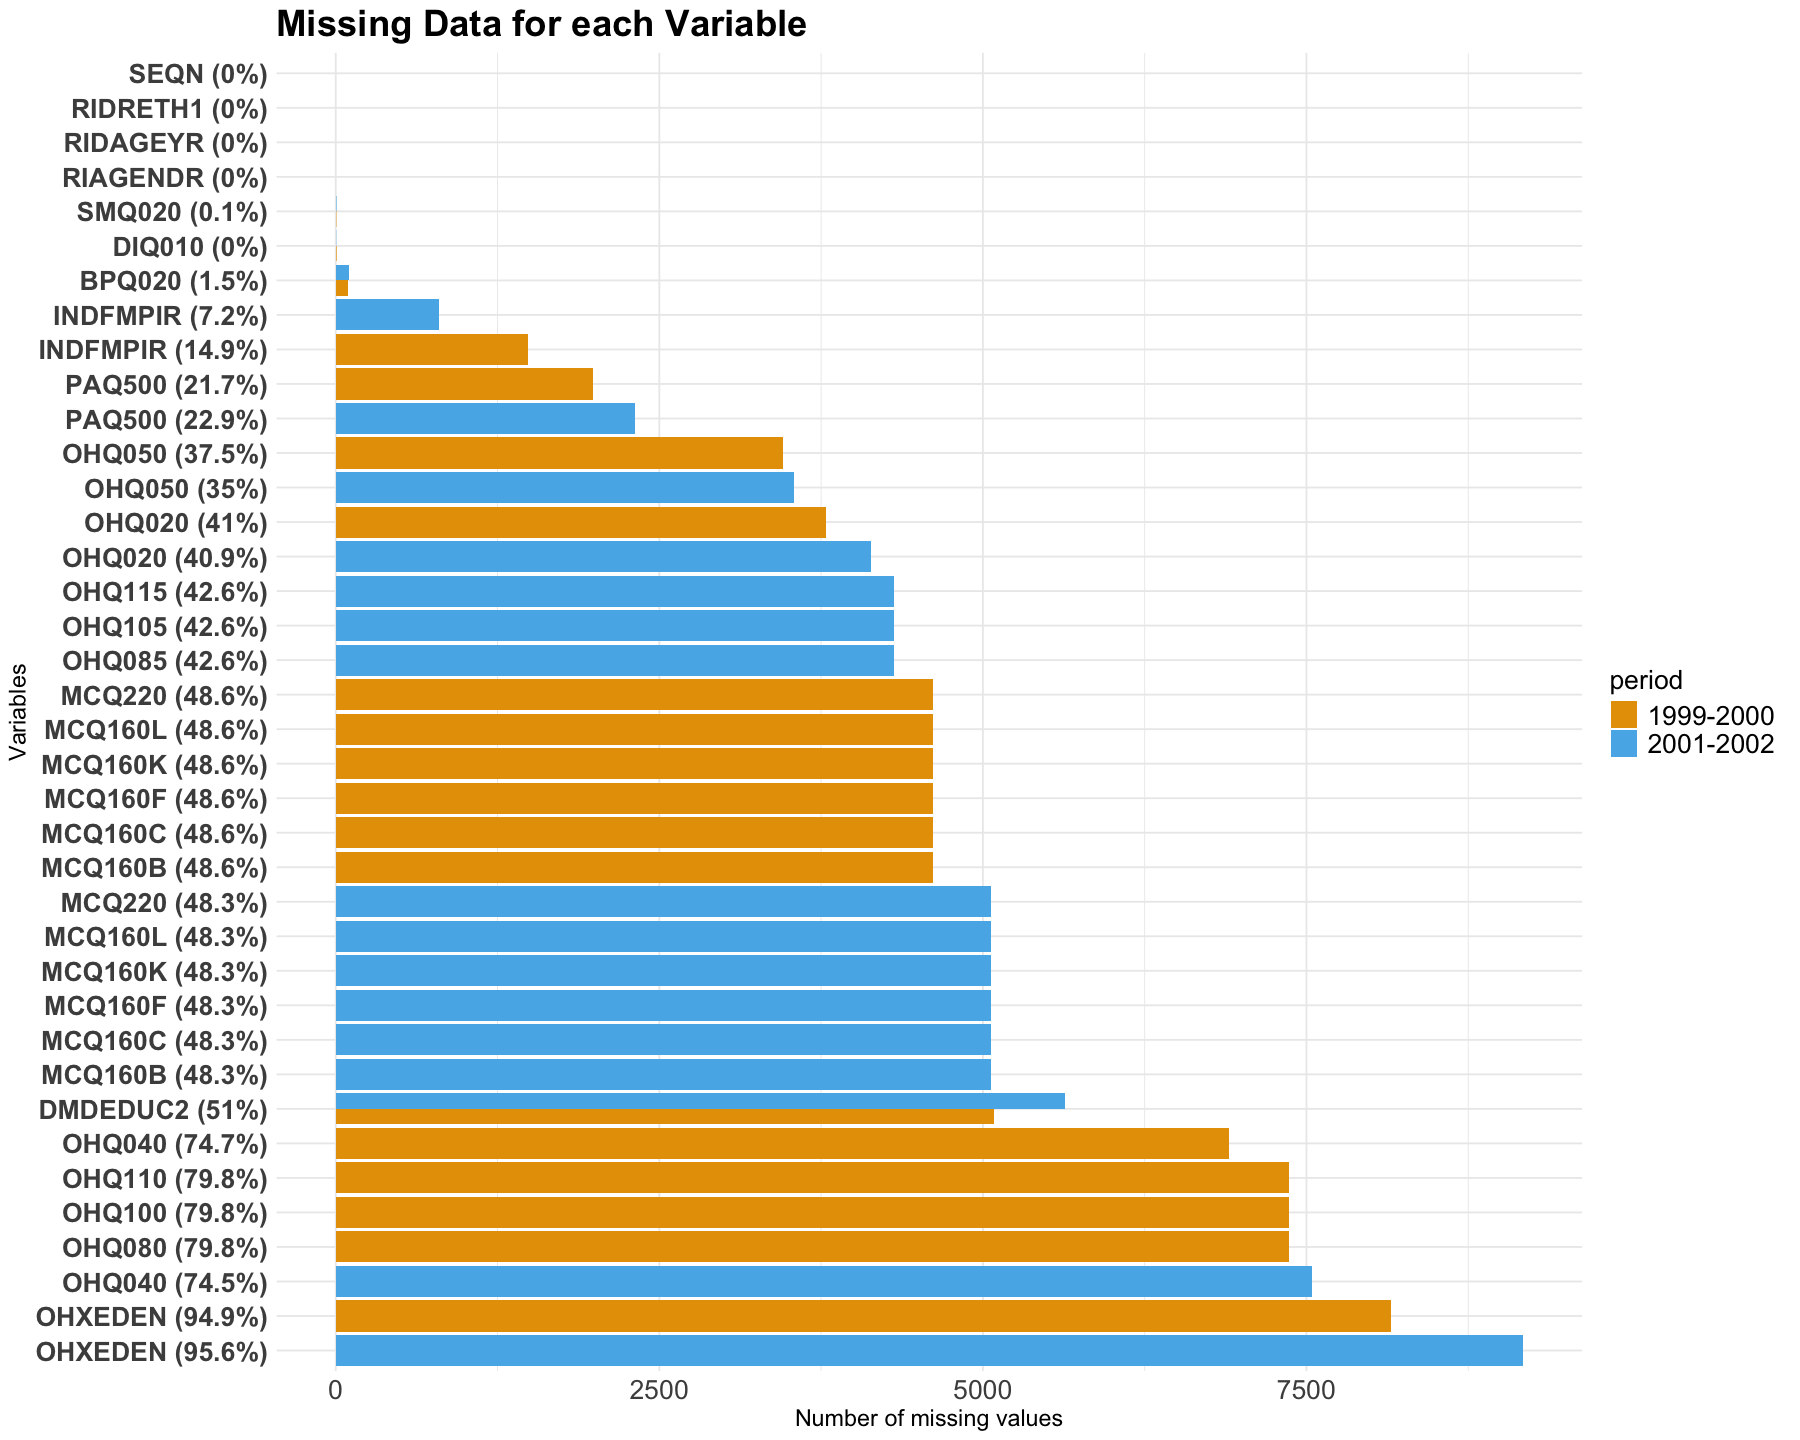

In [178]:
options(repr.plot.width=15, repr.plot.height=12)

ggplot(missing_data, aes(x = reorder(variable_label, -n_missing), y = n_missing, fill = period)) + 
  geom_col(position = 'dodge') + 
  coord_flip() + 
  labs(title = "Missing Data for each Variable",
       x = "Variables",
       y = "Number of missing values") + 
  theme_minimal() + 
  theme(
    plot.title = element_text(size = 22, face = "bold"),  
    axis.text.y = element_text(size = 16, face = "bold"),  
    axis.text.x = element_text(size = 16),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    legend.text = element_text(size = 16),
    legend.title = element_text(size = 16)
  ) +
  scale_fill_manual(values = c("1999-2000" = "#E69F00", "2001-2002" = "#56B4E9"))

### Merge datasets in a one and complete data frame 

Steps:
1. Horizontal union for the period 1999-2000
2. Horizontal union for the period 2001-2002
3. Vertical union of the two periods
4. Filter with Age >= 60

In [137]:
# Rename the following features that are the same of each df but with different names:
# OHQ080 e OHQ085
# OHQ100 e OHQ105
# OHQ0110 e OHQ115

oral_01_02_selected_renamed <- oral_01_02_selected %>%
  rename(OHQ080 = OHQ085, OHQ100 = OHQ105, OHQ110 = OHQ115)

colnames(oral_01_02_selected_renamed)

[1] "SEQN"   "OHQ080" "OHQ100" "OHQ110" "OHQ020" "OHQ040" "OHQ050"

In [153]:
datasets_99_00 <- list(
  demo_99_00_selected, smoking_99_00_selected, med_cond_99_00_selected,
  diabetes_99_00_selected, blood_pressure_99_00_selected, physical_99_00_selected,
  eden_99_00_selected, oral_99_00_selected
)

datasets_01_02 <- list(
  demo_01_02_selected, smoking_01_02_selected, med_cond_01_02_selected,
  diabetes_01_02_selected, blood_pressure_01_02_selected, physical_01_02_selected,
  eden_01_02_selected, oral_01_02_selected_renamed
)

# Horizontal union for period 1999/00 and 2001/02

df_99_00 <- Reduce(function(x, y) full_join(x, y, by = "SEQN"), datasets_99_00)

df_01_02 <- Reduce(function(x, y) full_join(x, y, by = "SEQN"), datasets_01_02)

In [154]:
# Vertical union for these two periods

df_final <- bind_rows(df_99_00, df_01_02)

dim(df_final)

[1] 21004    23

In [155]:
head(df_final)

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,INDFMPIR,SMQ020,MCQ160B,MCQ160C,MCQ160F,...,DIQ010,BPQ020,PAQ500,OHXEDEN,OHQ080,OHQ100,OHQ110,OHQ020,OHQ040,OHQ050
,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,Female,2,Non-Hispanic Black,NA,0.86,NA,NA,NA,NA,...,No,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,Male,77,Non-Hispanic White,College Graduate or above,5.00,No,No,No,No,...,No,No,"less active, or",NA,No,No,No,Never?,NA,2 or more times a year
3,3,Female,10,Non-Hispanic White,NA,1.47,NA,NA,NA,NA,...,No,NA,NA,NA,NA,NA,NA,NA,NA,Once a year
4,4,Male,1,Non-Hispanic Black,NA,0.57,NA,NA,NA,NA,...,No,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,Male,49,Non-Hispanic White,College Graduate or above,5.00,Yes,No,No,No,...,No,Yes,About the same?,NA,No,No,No,Never?,Yes,2 or more times a year
6,6,Female,19,Other Race - Including Multi-Racial,NA,1.21,NA,NA,NA,NA,...,No,No,About the same?,NA,NA,NA,NA,Never?,NA,Once a year


In [156]:
# Condition to exclude people younger than 60 years old

elderly_df_final <- df_final %>%
  filter(RIDAGEYR >= 60)

dim(elderly_df_final)

[1] 3706   23

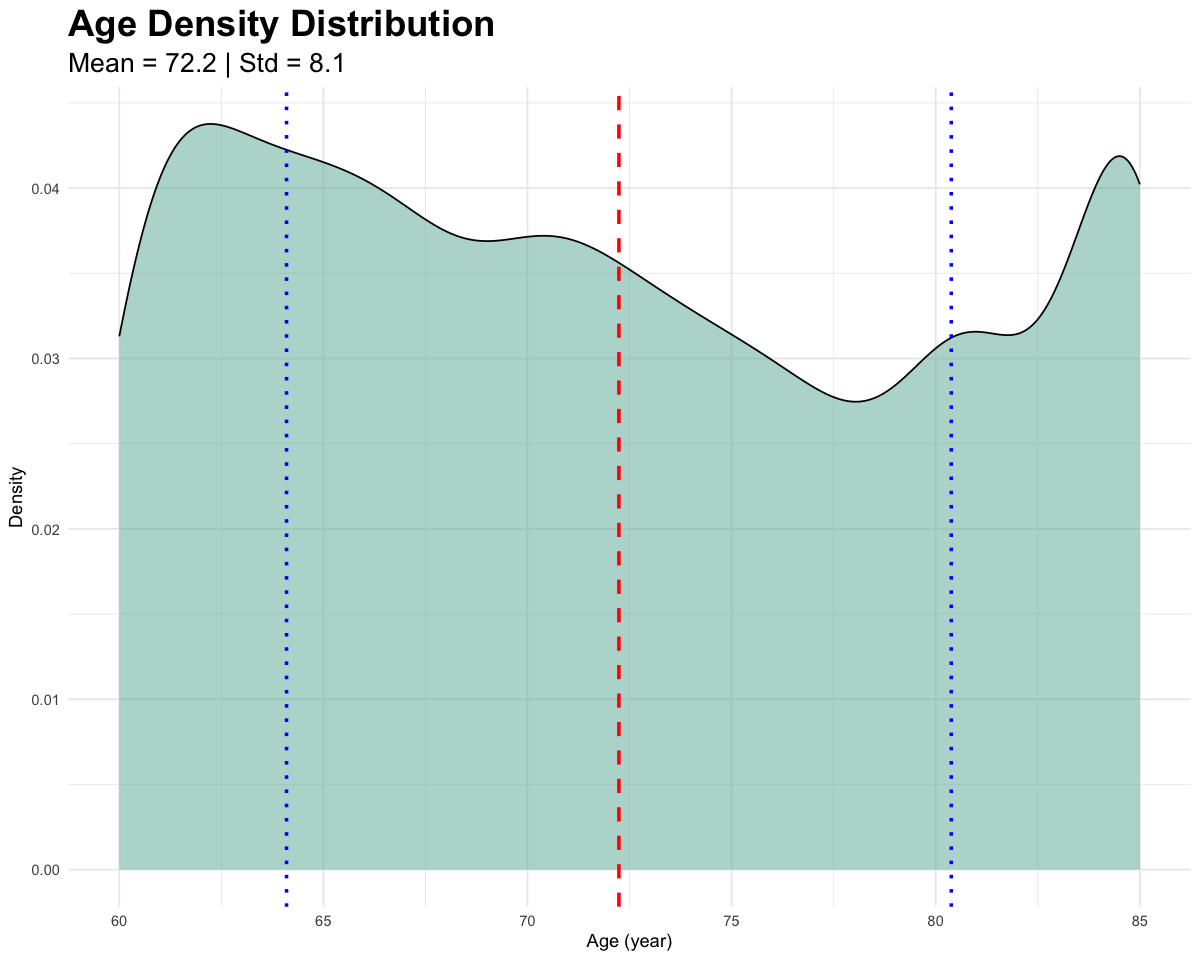

In [ ]:
# Plot age distribution

options(repr.plot.width = 10, repr.plot.height = 8)

mean_age <- mean(elderly_df_final$RIDAGEYR, na.rm = TRUE)
sd_age <- sd(elderly_df_final$RIDAGEYR, na.rm = TRUE)

ggplot(elderly_df_final, aes(x = RIDAGEYR)) +
  geom_density(fill = "#69b3a2", alpha = 0.5, color = "black") +
  geom_vline(xintercept = mean_age, 
             linetype = "dashed", color = "red", size = 1) +
  geom_vline(xintercept = mean_age + sd_age,
             linetype = "dotted", color = "blue", size = 1) +
  geom_vline(xintercept = mean_age - sd_age,
             linetype = "dotted", color = "blue", size = 1) +
  labs(title = "Age Density Distribution",
       x = "Age (year)",
       y = "Density",
       subtitle = paste0("Mean = ", round(mean_age, 1),
                         " | Std = ", round(sd_age, 1))) +
  theme_minimal() +
  theme(plot.title = element_text(size = 22, face = "bold"),
    plot.subtitle = element_text(size = 16)
  )

In [157]:
# Remove every row with a least one NA values

elderly_df_final_no_na <- na.omit(elderly_df_final)

dim(elderly_df_final_no_na)

[1] 26 23

In [158]:
# Other method to choose which NA columns to drop

elderly_df_final_no_na <- elderly_df_final %>% drop_na()

dim(elderly_df_final_no_na)

[1] 26 23

In [159]:
# JUST FOR TESTING

elderly_df_final_no_eden_ohq040 <- subset(elderly_df_final, select = -c(OHXEDEN, OHQ040))

elderly_df_final_no_eden_ohq040 <- na.omit(elderly_df_final_no_eden_ohq040)

dim(elderly_df_final_no_eden_ohq040)

[1] 1499   21

### Next steps

In [ ]:
# Feature Engineering

process_features <- function(data) {
    processed_data <- data %>%
        mutate(
            gender = factor(x = RIAGENDR, levels = c(1, 2), labels = c("Male", "Female"))
        ) %>%
        mutate(
            ethnicity = case_when(
                RIDRETH1 == 1 ~ "Mexican American",
                RIDRETH1 == 2 ~ "Other Hispanic",
                RIDRETH1 == 3 ~ "Non-Hispanic White",
                RIDRETH1 == 4 ~ "Non-Hispanic Black",
                RIDRETH1 == 5 ~ "Other Race - Including Multi-Racial",
                TRUE ~ NA_character_
            ),
            ethnicity_num = as.numeric(RIDRETH1)
        ) %>%
        mutate(
            education = case_when(
                DMDEDUC2 == 1 ~ "Less than 9th grade",
                DMDEDUC2 == 2 ~ "9-11th grade",
                DMDEDUC2 == 3 ~ "High school graduate/GED",
                DMDEDUC2 == 4 ~ "Some college or AA degree",
                DMDEDUC2 == 5 ~ "College graduate or above",
                DMDEDUC2 %in% c(7, 9) ~ NA_character_
            ),
            education_3cat = case_when(
                DMDEDUC2 %in% c(1, 2) ~ "Less than 12 years",
                DMDEDUC2 == 3 ~ "12 years",
                DMDEDUC2 %in% c(4, 5) ~ "More than 12 years",
                TRUE ~ NA_character_
            ),
            education_years = case_when(
                DMDEDUC2 == 1 ~ 8, # Less than 9th grade
                DMDEDUC2 == 2 ~ 10, # 9-11th grade
                DMDEDUC2 == 3 ~ 12, # High school/GED
                DMDEDUC2 == 4 ~ 14, # Some college/AA
                DMDEDUC2 == 5 ~ 16, # College graduate
                TRUE ~ NA_real_
            )
        ) %>%
        # Binary indicators for each ethnic category
        mutate(
            is_mexican_american = RIDRETH1 == 1,
            is_other_hispanic = RIDRETH1 == 2,
            is_nh_white = RIDRETH1 == 3,
            is_nh_black = RIDRETH1 == 4,
            is_other_race = RIDRETH1 == 5
        ) %>%
        # Binary indicators for each educational level
        mutate(
            is_less_than_hs = DMDEDUC2 %in% c(1, 2),
            is_hs_grad = DMDEDUC2 == 3,
            is_some_college = DMDEDUC2 == 4,
            is_college_grad = DMDEDUC2 == 5
        ) %>%
        mutate(
            income_category = case_when(
                INDHHIN2 %in% c(1:4) ~ "Under $20,000",
                INDHHIN2 %in% c(5:7) ~ "$20,000 to $44,999",
                INDHHIN2 %in% c(8:10) ~ "$45,000 to $74,999",
                INDHHIN2 == 13 ~ "$75,000 to $99,999",
                INDHHIN2 == 14 ~ "$100,000 and Over",
                INDHHIN2 %in% c(77, 99) ~ NA_character_,
                TRUE ~ NA_character_
            )
        ) %>%
        mutate(
            income_numeric = case_when(
                INDHHIN2 == 1 ~ 2500, # $0-$4,999
                INDHHIN2 == 2 ~ 7500, # $5,000-$9,999
                INDHHIN2 == 3 ~ 12500, # $10,000-$14,999
                INDHHIN2 == 4 ~ 17500, # $15,000-$19,999
                INDHHIN2 == 5 ~ 22500, # $20,000-$24,999
                INDHHIN2 == 6 ~ 30000, # $25,000-$34,999
                INDHHIN2 == 7 ~ 40000, # $35,000-$44,999
                INDHHIN2 == 8 ~ 50000, # $45,000-$54,999
                INDHHIN2 == 9 ~ 60000, # $55,000-$64,999
                INDHHIN2 == 10 ~ 70000, # $65,000-$74,999
                INDHHIN2 == 13 ~ 87500, # $75,000-$99,999
                INDHHIN2 == 14 ~ 125000, # $100,000 and Over
                TRUE ~ NA_real_
            )
        ) %>%
        mutate(
            permanent_teeth = rowSums(select(., starts_with("OHX") & ends_with("TC")) == 1, na.rm = TRUE),
            missing_teeth = rowSums(select(., starts_with("OHX") & ends_with("TC")) == 2, na.rm = TRUE),
            root_fragments = rowSums(select(., starts_with("OHX") & ends_with("TC")) == 3, na.rm = TRUE),
            perc_permanent = (permanent_teeth / (permanent_teeth + missing_teeth + root_fragments)) * 100,
            dental_status = case_when(
                permanent_teeth >= 20 ~ "Adequate dentition",
                permanent_teeth >= 10 ~ "Partial dentition",
                TRUE ~ "Poor dentition"
            )
        ) %>%
        mutate(
            periodontal_disease = case_when(
                # Definition CDC/AAP as in the paper (this is a simplified example)
                rowMeans(select(., ends_with("CSC")), na.rm = TRUE) >= 4 ~ "Moderate/Severe",
                TRUE ~ "No/Mild"
            )
        )

    return(processed_data)
}


In [ ]:
preprocessed_data <- process_features(features_selected)
head(preprocessed_data)


## NHANES 2013/14: Intrinsic Capacity and Periodontal disease

### Import Libraries

In [ ]:
library(haven)
library(nhanesA)
library(survey)
library(MASS)
library(dplyr)
library(tidyr)
library(tidyverse)
library(ggplot2)
library(readr)
library(flextable)
library(officer)

### Configurations

In [ ]:
path_to_data <- "/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/data/NHANES/2013_14/"

### Load Dataset & Feature Selection

In [36]:
# Demographics 

demo_13_14 <- read_xpt(file.path(path_to_data, "DEMO_H.xpt.txt"))

demo_13_14_selected <- demo_13_14 %>%
    select(SEQN, RIAGENDR, RIDAGEYR, RIDRETH1, DMDEDUC2, INDFMPIR)

head(demo_13_14_selected)

SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,INDFMPIR
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73557,1,69,4,3,0.84
73558,1,54,3,3,1.78
73559,1,72,3,4,4.51
73560,1,9,3,NA,2.52
73561,2,73,3,5,5.00
73562,1,56,1,4,4.79


In [37]:
# Alcohol Use

alcohol_13_14 <- read_xpt(file.path(path_to_data, "ALQ_H.xpt.txt"))

alcohol_13_14_selected <- alcohol_13_14 %>%
    select(SEQN, ALQ101, ALQ130)

head(alcohol_13_14_selected)

SEQN,ALQ101,ALQ130
<dbl>,<dbl>,<dbl>
73557,1,1
73558,1,4
73559,1,NA
73561,1,NA
73562,1,1
73564,2,1


In [38]:
# Smoking status

smoking_13_14 <- read_xpt(file.path(path_to_data, "SMQ_H.xpt.txt"))

smoking_13_14_selected <- smoking_13_14 %>%
    select(SEQN, SMQ020, SMQ040, SMD650)

head(smoking_13_14_selected)

SEQN,SMQ020,SMQ040,SMD650
<dbl>,<dbl>,<dbl>,<dbl>
73557,1,3,NA
73558,1,2,1
73559,1,3,NA
73561,2,NA,NA
73562,1,3,NA
73564,2,NA,NA


In [50]:
# Medical Conditions

med_conditions_13_14 <- read_xpt(file.path(path_to_data, "MCQ_H.xpt.txt"))

med_conditions_13_14_selected <- med_conditions_13_14 %>%
    select(SEQN, MCQ160B, MCQ160C, MCQ160D, MCQ160E, MCQ160F, MCQ160O, MCQ160L, MCQ220)

head(med_conditions_13_14_selected)

SEQN,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160O,MCQ160L,MCQ220
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73557,2,2,2,2,1,2,2,2
73558,2,2,2,2,2,2,2,2
73559,2,2,2,2,2,2,2,1
73560,NA,NA,NA,NA,NA,NA,NA,NA
73561,2,2,2,2,2,2,2,2
73562,2,1,2,1,2,2,2,2


In [41]:
# Blood Pressure

blood_pressure_13_14 <- read_xpt(file.path(path_to_data, "BPQ_H.xpt.txt"))

blood_pressure_13_14_selected <- blood_pressure_13_14 %>%
    select(SEQN, BPQ020)

head(blood_pressure_13_14_selected)

SEQN,BPQ020
<dbl>,<dbl>
73557,1
73558,1
73559,1
73561,1
73562,1
73564,1


In [42]:
# Diabetes

diabetes_13_14 <- read_xpt(file.path(path_to_data, "DIQ_H.xpt.txt"))

diabetes_13_14_selected <- diabetes_13_14 %>%
    select(SEQN, DIQ010)

head(diabetes_13_14_selected)

SEQN,DIQ010
<dbl>,<dbl>
73557,1
73558,1
73559,1
73560,2
73561,2
73562,2


In [68]:
# Periodontal disease with clinical assessment (Oral Health - Periodontal)

periodontal_13_14 <- read_xpt(file.path(path_to_data, "OHXPER_H.xpt.txt"))

selected_cols <- colnames(periodontal_13_14)[grepl("^OHX\\d{2}(PC|LA)[A-Z]$", colnames(periodontal_13_14))]

periodontal_13_14_selected <- periodontal_13_14 %>%
    select(SEQN, all_of(selected_cols))

head(periodontal_13_14_selected)

SEQN,OHX02PCD,OHX02PCM,OHX02PCS,OHX02PCP,OHX02PCL,OHX02PCA,OHX02LAD,OHX02LAM,OHX02LAS,...,OHX31PCS,OHX31PCP,OHX31PCL,OHX31PCA,OHX31LAD,OHX31LAM,OHX31LAS,OHX31LAP,OHX31LAL,OHX31LAA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73557,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
73558,2,2,4,4,5,2,4,3,4,...,99,99,99,99,99,99,99,99,99,99
73559,1,1,1,2,2,2,1,1,1,...,99,99,99,99,99,99,99,99,99,99
73561,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
73562,2,2,2,3,2,3,2,2,2,...,99,99,99,99,99,99,99,99,99,99
73564,2,1,2,2,1,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2


In [49]:
# Oral Health - Dentition

dentition_13_14 <- read_xpt(file.path(path_to_data, "OHXDEN_H.xpt.txt"))
head(dentition_13_14)

SEQN,OHDEXSTS,OHDDESTS,OHXIMP,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,...,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
73557,1,1,2,4,4,4,4,4,4,...,,,,,,,,,,
73558,1,1,2,4,2,5,2,2,2,...,,,,,,,,,,
73559,1,1,2,4,2,2,2,2,2,...,,,,,,,,,,
73560,1,1,NA,4,4,2,1,1,4,...,1,9,9,1,4,0,4,4,1,9
73561,1,1,2,4,4,2,4,2,2,...,,,,,,,,,,
73562,1,1,2,4,2,2,4,2,4,...,,,,,,,,,,


In [29]:
# Periodontal disease with Oral Health

oral_health_13_14 <- read_xpt(file.path(path_to_data, "OHQ_H.xpt.txt"))
head(oral_health_13_14)

SEQN,OHQ030,OHQ033,OHQ770,OHQ780A,OHQ780B,OHQ780C,OHQ780D,OHQ780E,OHQ780F,...,OHQ850,OHQ855,OHQ860,OHQ865,OHQ870,OHQ875,OHQ880,OHQ885,OHQ895,OHQ900
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73557,6,4,2,NA,NA,NA,NA,NA,NA,...,2,2,2,2,0,0,2,2,NA,NA
73558,6,3,1,10,NA,NA,NA,NA,NA,...,1,2,2,2,4,0,2,2,NA,NA
73559,1,1,2,NA,NA,NA,NA,NA,NA,...,1,2,2,2,1,7,1,1,1,3
73560,1,1,2,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
73561,1,1,2,NA,NA,NA,NA,NA,NA,...,2,2,2,2,7,7,2,2,NA,NA
73562,5,3,2,NA,NA,NA,NA,NA,NA,...,2,1,2,2,7,7,2,2,NA,NA


In [45]:
# Intrinsic Capacity - Physical Functioning

locomotion_13_14 <- read_xpt(file.path(path_to_data, "PFQ061I.txt"))

locomotion_13_14_selected <- locomotion_13_14 %>%
    select(SEQN, PFQ061I)

head(locomotion_13_14_selected)

SEQN,PFQ061I
<dbl>,<dbl>
73557,1
73558,NA
73559,1
73560,NA
73561,1
73562,1


In [46]:
# Intrinsic Capacity - Disability

disability_13_14 <- read_xpt(file.path(path_to_data, "DLQ040.txt"))

disability_13_14_selected <- disability_13_14 %>%
    select(SEQN, DLQ010, DLQ020, DLQ040)

head(disability_13_14_selected)

SEQN,DLQ010,DLQ020,DLQ040
<dbl>,<dbl>,<dbl>,<dbl>
73557,2,2,2
73558,2,2,2
73559,1,2,2
73560,2,2,2
73561,2,2,2
73562,1,1,2


In [47]:
# Intrinsic Capacity - Mental Health (Depression Screener)

mental_health_13_14 <- read_xpt(file.path(path_to_data, "DPQ-.txt"))

mental_health_13_14_selected <- mental_health_13_14 %>%
    select(SEQN, DPQ010, DPQ020, DPQ050)

head(mental_health_13_14_selected)

SEQN,DPQ010,DPQ020,DPQ050
<dbl>,<dbl>,<dbl>,<dbl>
73557,1,0,0
73558,2,0,0
73559,0,0,0
73561,2,1,3
73562,3,3,3
73564,0,1,0


In [48]:
# Intrinsic Capacity - Weight History

weight_history_13_14 <- read_xpt(file.path(path_to_data, "WHQ060.txt"))

weight_history_13_14_selected <- weight_history_13_14 %>%
    select(SEQN, WHQ060)

head(weight_history_13_14_selected)

SEQN,WHQ060
<dbl>,<dbl>
73557,1
73558,NA
73559,NA
73561,2
73562,NA
73564,NA


### Merge datasets

In [207]:
# Merge demographics data

demographics_13_14 <- demo_13_14_selected %>%
  full_join(smoking_13_14_selected, by = "SEQN") %>%
  full_join(alcohol_13_14_selected, by = "SEQN") %>%
  full_join(med_conditions_13_14_selected, by = "SEQN") %>%
  full_join(blood_pressure_13_14_selected, by = "SEQN") %>%
  full_join(diabetes_13_14_selected, by = "SEQN")

head(demographics_13_14)

SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,INDFMPIR,SMQ020,SMQ040,SMD650,ALQ101,...,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,MCQ160O,MCQ160L,MCQ220,BPQ020,DIQ010
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73557,1,69,4,3,0.84,1,3,NA,1,...,2,2,2,2,1,2,2,2,1,1
73558,1,54,3,3,1.78,1,2,1,1,...,2,2,2,2,2,2,2,2,1,1
73559,1,72,3,4,4.51,1,3,NA,1,...,2,2,2,2,2,2,2,1,1,1
73560,1,9,3,NA,2.52,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,2
73561,2,73,3,5,5.00,2,NA,NA,1,...,2,2,2,2,2,2,2,2,1,2
73562,1,56,1,4,4.79,1,3,NA,1,...,2,1,2,1,2,2,2,2,1,2


In [208]:
dim(demo_13_14_selected)
dim(smoking_13_14_selected)
dim(alcohol_13_14_selected)
dim(med_conditions_13_14_selected)
dim(blood_pressure_13_14_selected)
dim(diabetes_13_14_selected)
dim(demographics_13_14)

[1] 10175     6

[1] 7168    4

[1] 5924    3

[1] 9770    9

[1] 6464    2

[1] 9770    2

[1] 10175    21

In [209]:
# Drop rows with all 99 values for each column in periodontal dataframe

periodontal_13_14_selected_clean <- periodontal_13_14_selected[rowSums(periodontal_13_14_selected[, colnames(periodontal_13_14_selected) != "SEQN"] == 99) != (ncol(periodontal_13_14_selected) - 1), ]

print(paste("Deleted Rows:", nrow(periodontal_13_14_selected) - nrow(periodontal_13_14_selected_clean)))

head(periodontal_13_14_selected_clean)

[1] "Deleted Rows: 364"


SEQN,OHX02PCD,OHX02PCM,OHX02PCS,OHX02PCP,OHX02PCL,OHX02PCA,OHX02LAD,OHX02LAM,OHX02LAS,...,OHX31PCS,OHX31PCP,OHX31PCL,OHX31PCA,OHX31LAD,OHX31LAM,OHX31LAS,OHX31LAP,OHX31LAL,OHX31LAA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73558,2,2,4,4,5,2,4,3,4,...,99,99,99,99,99,99,99,99,99,99
73559,1,1,1,2,2,2,1,1,1,...,99,99,99,99,99,99,99,99,99,99
73561,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99
73562,2,2,2,3,2,3,2,2,2,...,99,99,99,99,99,99,99,99,99,99
73564,2,1,2,2,1,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2
73566,2,1,2,3,2,3,2,1,2,...,2,2,2,3,2,2,2,2,2,2


In [210]:
# Merge demographic data and periodontal features
# drop demographic rows with no correspondance to periodontal dataframe

df_13_14 <- merge(periodontal_13_14_selected_clean, demographics_13_14, by = "SEQN", all.x = TRUE)

head(df_merged)

,SEQN,OHX02PCD,OHX02PCM,OHX02PCS,OHX02PCP,OHX02PCL,OHX02PCA,OHX02LAD,OHX02LAM,OHX02LAS,...,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC2,INDFMPIR,SMQ020,SMQ040,SMD650,ALQ101,ALQ130
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,73558,2,2,4,4,5,2,4,3,4,...,1,54,3,3,1.78,1,2,1,1,4
2,73559,1,1,1,2,2,2,1,1,1,...,1,72,3,4,4.51,1,3,NA,1,NA
3,73561,99,99,99,99,99,99,99,99,99,...,2,73,3,5,5.00,2,NA,NA,1,NA
4,73562,2,2,2,3,2,3,2,2,2,...,1,56,1,4,4.79,1,3,NA,1,1
5,73564,2,1,2,2,1,2,2,1,2,...,2,61,3,5,5.00,2,NA,NA,2,1
6,73566,2,1,2,3,2,3,2,1,2,...,2,56,3,3,0.48,1,1,1,1,1


In [211]:
dim(df_13_14)
dim(demographics_13_14)
dim(periodontal_13_14_selected_clean)

[1] 4305  357

[1] 10175    21

[1] 4305  337

In [212]:
# Filter with AGE >= 60

df_13_14_age_60 <- subset(df_13_14, RIDAGEYR >= 60)

dim(df_13_14_age_60)

[1] 1167  357

### Classify Periodontitis

In [213]:
classify_periodontitis <- function(df) {
  # Function to count sites on different teeth that meet a criterion
  count_sites_different_teeth <- function(tooth_sites,
                                          threshold, measurement_type) {
    teeth_with_sites <- list()
    for(tooth in unique(sub("(OHX\\d+).*", "\\1", names(tooth_sites)))) {
      # Include all interproximal sites
      # S = mesio-facial, D = distal, A = mesio-lingual, P = disto-lingual
      tooth_cols <- grep(paste0(tooth, measurement_type, "[SDAP]$"), 
                        names(tooth_sites), value = TRUE)
      values <- as.numeric(tooth_sites[tooth_cols])
      valid_values <- values[values != 99 & !is.na(values)]
      # If at least one site exceeds the threshold, add to list
      if(length(valid_values) > 0 && any(valid_values >= threshold)) {
        teeth_with_sites <- c(teeth_with_sites, tooth)
      }
    }
    # Returns the number of different teeth with sites exceeding the threshold
    return(length(teeth_with_sites))
  }

  ppd_cols <- grep("PC[SDAP]$", names(df), value = TRUE)
  cal_cols <- grep("LA[SDAP]$", names(df), value = TRUE)

  # Initializes the columns for classification
  df$severe <- FALSE
  df$moderate <- FALSE

  for(i in 1:nrow(df)) {
    ppd_values <- df[i, ppd_cols]
    cal_values <- df[i, cal_cols]

    # Counts teeth with sites that meet the criteria
    teeth_with_cal_6mm <- count_sites_different_teeth(cal_values, 6, "LA")
    teeth_with_cal_4mm <- count_sites_different_teeth(cal_values, 4, "LA")
    teeth_with_ppd_5mm <- count_sites_different_teeth(ppd_values, 5, "PC")

    # Severe periodontitis classification
    # ≥2 teeth with interproximal sites CAL ≥6 mm AND ≥1 tooth with PPD ≥5 mm
    if(teeth_with_cal_6mm >= 2 && teeth_with_ppd_5mm >= 1) {
      df$severe[i] <- TRUE
    }
    # Moderate periodontitis classification
    # ≥2 teeth with interproximal sites CAL ≥4 mm OR ≥2 tooth with PPD ≥5 mm
    else if(teeth_with_cal_4mm >= 2 || teeth_with_ppd_5mm >= 2) {
      df$moderate[i] <- TRUE
    }
  }

  # Final Classification
  df$periodontitis <- case_when(
    df$severe ~ "Severe",
    df$moderate ~ "Moderate",
    TRUE ~ "None/Mild"
  )

  return(df)
}

In [214]:
df_classification <- classify_periodontitis(df_13_14_age_60)

In [215]:
head(df_classification)

,SEQN,OHX02PCD,OHX02PCM,OHX02PCS,OHX02PCP,OHX02PCL,OHX02PCA,OHX02LAD,OHX02LAM,OHX02LAS,...,MCQ160E,MCQ160F,MCQ160O,MCQ160L,MCQ220,BPQ020,DIQ010,severe,moderate,periodontitis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
2,73559,1,1,1,2,2,2,1,1,1,...,2,2,2,2,1,1,1,FALSE,FALSE,None/Mild
3,73561,99,99,99,99,99,99,99,99,99,...,2,2,2,2,2,1,2,FALSE,FALSE,None/Mild
5,73564,2,1,2,2,1,2,2,1,2,...,2,2,2,2,2,1,2,FALSE,FALSE,None/Mild
16,73604,99,99,99,99,99,99,99,99,99,...,2,2,2,2,1,2,2,FALSE,FALSE,None/Mild
18,73613,99,99,99,99,99,99,99,99,99,...,2,2,2,2,2,1,2,FALSE,FALSE,None/Mild
19,73616,2,1,2,1,1,2,2,1,2,...,2,2,2,2,2,2,2,FALSE,FALSE,None/Mild


In [216]:
dim(df_classification)

[1] 1167  360

In [217]:
table_counts <- table(df_classification$periodontitis)
table_percent <- prop.table(table_counts) * 100

print("Distribution of periodontitis categories (counting):")
print(table_counts)

print("Distribution of periodontitis categories (percentage):")
print(round(table_percent, 2))


[1] "Distribution of periodontitis categories (counting):"

 Moderate None/Mild    Severe 
      520       508       139 
[1] "Distribution of periodontitis categories (percentage):"

 Moderate None/Mild    Severe 
    44.56     43.53     11.91 


### Mean PPD and CAL

In [218]:
calculate_means <- function(df) {
  # Select columns for interproximal sites
  ppd_cols <- grep("PC[SDAP]$", names(df), value = TRUE)
  cal_cols <- grep("LA[SDAP]$", names(df), value = TRUE)
  
  # Calculate the average excluding invalid values
  calculate_valid_mean <- function(row, cols) {
    values <- as.numeric(row[cols])
    valid_values <- values[values != 99 & !is.na(values)]
    if(length(valid_values) > 0) {
      return(mean(valid_values, na.rm = TRUE))
    } else {
      return(NA)
    }
  }
  
  df$mean_ppd <- apply(df[ppd_cols], 1, calculate_valid_mean, cols = ppd_cols)
  df$mean_cal <- apply(df[cal_cols], 1, calculate_valid_mean, cols = cal_cols)
  
  df$mean_ppd <- round(df$mean_ppd, 2)
  df$mean_cal <- round(df$mean_cal, 2)
  
  return(df)
}

In [219]:
df_class_with_means <- calculate_means(df_classification)

In [220]:
head(df_class_with_means)

,SEQN,OHX02PCD,OHX02PCM,OHX02PCS,OHX02PCP,OHX02PCL,OHX02PCA,OHX02LAD,OHX02LAM,OHX02LAS,...,MCQ160O,MCQ160L,MCQ220,BPQ020,DIQ010,severe,moderate,periodontitis,mean_ppd,mean_cal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>
2,73559,1,1,1,2,2,2,1,1,1,...,2,2,1,1,1,FALSE,FALSE,None/Mild,1.51,2.05
3,73561,99,99,99,99,99,99,99,99,99,...,2,2,2,1,2,FALSE,FALSE,None/Mild,1.07,1.32
5,73564,2,1,2,2,1,2,2,1,2,...,2,2,2,1,2,FALSE,FALSE,None/Mild,1.46,1.46
16,73604,99,99,99,99,99,99,99,99,99,...,2,2,1,2,2,FALSE,FALSE,None/Mild,0.62,0.88
18,73613,99,99,99,99,99,99,99,99,99,...,2,2,2,1,2,FALSE,FALSE,None/Mild,1.77,1.94
19,73616,2,1,2,1,1,2,2,1,2,...,2,2,2,2,2,FALSE,FALSE,None/Mild,1.67,1.71


In [232]:
# Features selection for the descriptive analysis

columns_to_keep <- c("SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH1", "DMDEDUC2", "INDFMPIR", 
                     "SMQ020", "ALQ101", "MCQ160B", "MCQ160C", 
                     "MCQ160D", "MCQ160E", "MCQ160F", "MCQ160O", "MCQ160L", "MCQ220", "BPQ020", 
                     "DIQ010", "periodontitis", "mean_ppd", "mean_cal")

df_selected <- df_class_with_means[, columns_to_keep]

print(dim(df_selected))

[1] 1167   21


In [ ]:
# Drop rows with NA

df_selected_clean <- na.omit(df_selected)

print(paste("Deleted rows:", nrow(df_selected) - nrow(df_selected_clean)))

[1] "Deleted rows: 122"


In [255]:
# Drop rows with value 9 for the following columns:
# DMDEDUC2, SMQ020, MCQ160B, MCQ160C, MCQ160D, MCQ160E, MCQ160F, MCQ160L, BPQ020

columns_to_check <- c("DMDEDUC2", "SMQ020", "MCQ160B", "MCQ160C", "MCQ160D", 
                      "MCQ160E", "MCQ160F", "MCQ160L", "BPQ020", "ALQ101")

df_final <- df_selected_clean[!rowSums(df_selected_clean[, columns_to_check] == 9), ]

print(paste("Deleted rows:", nrow(df_selected_clean) - nrow(df_final)))

[1] "Deleted rows: 17"


In [257]:
dim(df_final)

[1] 1028   21

In [256]:
# Check unique values for categorical features

columns_to_check <- c("RIAGENDR", "RIDRETH1", "DMDEDUC2",
                      "SMQ020", "ALQ101", "MCQ160B", "MCQ160C", 
                      "MCQ160D", "MCQ160E", "MCQ160F", "MCQ160O", 
                      "MCQ160L", "MCQ220", "BPQ020", "DIQ010")

unique_values <- lapply(df_final[, columns_to_check], unique)

for (col in names(unique_values)) {
  print(paste("Unique values for", col, ":"))
  print(unique_values[[col]])
  print("---------------")
}

[1] "Unique values for RIAGENDR :"
[1] 1 2
[1] "---------------"
[1] "Unique values for RIDRETH1 :"
[1] 3 4 5 1 2
[1] "---------------"
[1] "Unique values for DMDEDUC2 :"
[1] 4 5 2 3 1
[1] "---------------"
[1] "Unique values for SMQ020 :"
[1] 1 2
[1] "---------------"
[1] "Unique values for ALQ101 :"
[1] 1 2
[1] "---------------"
[1] "Unique values for MCQ160B :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ160C :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ160D :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ160E :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ160F :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ160O :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ160L :"
[1] 2 1
[1] "---------------"
[1] "Unique values for MCQ220 :"
[1] 1 2
[1] "---------------"
[1] "Unique values for BPQ020 :"
[1] 1 2
[1] "---------------"
[1] "Unique values for DIQ010 :"
[1] 1 2 3
[1] "---------------"


### Descriptive Analysis

In [262]:
# Function to create a more detailed table of continuous variables

create_continuous_vars_table <- function(df) {
  continuous_vars <- c("RIDAGEYR", "INDFMPIR", "mean_ppd", "mean_cal")
  
  # Descriptive Statistics
  get_stats <- function(x) {
    c(
      n = sum(!is.na(x)),
      mean = mean(x, na.rm = TRUE),
      sd = sd(x, na.rm = TRUE),
      median = median(x, na.rm = TRUE),
      q1 = quantile(x, 0.25, na.rm = TRUE),
      q3 = quantile(x, 0.75, na.rm = TRUE),
      min = min(x, na.rm = TRUE),
      max = max(x, na.rm = TRUE)
    )
  }
  
  # Calculates statistics for each variable, overall and by group
  results <- lapply(continuous_vars, function(var) {
    # Overall statistics
    overall <- get_stats(df[[var]])
    
    # Statistics by periodontitis group
    by_group <- tapply(df[[var]], df$periodontitis, get_stats)
    
    # ANOVA or Kruskal-Wallis test
    normal_test <- shapiro.test(df[[var]])
    if(normal_test$p.value > 0.05) {
      test_result <- oneway.test(df[[var]] ~ df$periodontitis)
    } else {
      test_result <- kruskal.test(df[[var]] ~ df$periodontitis)
    }
    
    list(
      overall = overall,
      by_group = by_group,
      p_value = test_result$p.value
    )
  })
  
  names(results) <- continuous_vars
  return(results)
}

In [346]:
# Function for the descriptive analysis

create_descriptive_table <- function(df) {
  require(tableone)
  require(dplyr)

  df$periodontitis <- factor(df$periodontitis, levels = c("None/Mild", "Moderate", "Severe"))
  
  # Recoding categorical variables
  df <- df %>%
    mutate(
      `Age (years)` = RIDAGEYR,
      `Ratio of family income` = INDFMPIR,
      `Mean PPD` = mean_ppd,
      `Mean CAL` = mean_cal,
      Gender = factor(RIAGENDR, levels = c(1, 2), 
                      labels = c("Male", "Female")),
      
      Ethnicity = factor(RIDRETH1, levels = 1:5, 
                         labels = c("Mexican American", "Other Hispanic",
                                    "Non-Hispanic White", "Non-Hispanic Black",
                                    "Other Race")),
      
      Education = factor(DMDEDUC2, levels = 1:5,
                         labels = c("Less than 9th grade", "9-11th grade",
                                    "High school graduate",
                                    "Some college/AA degree",
                                    "College graduate or above")),
      
      Smoking = factor(SMQ020, levels = c(1, 2),
                       labels = c("Yes", "No")),
      
      `Alcohol intake` = factor(ALQ101, levels = c(1, 2),
                       labels = c("Over 12 alcohol drinks/1 yr",
                       "Under 12 alcohol drinks/1 yr")),
      
      `Heart Failure` = factor(MCQ160B, levels = c(1, 2), 
                             labels = c("Yes", "No")),
      `Coronary Heart` = factor(MCQ160C, levels = c(1, 2),
                              labels = c("Yes", "No")),
      Angina = factor(MCQ160D, levels = c(1, 2),
                      labels = c("Yes", "No")),
      `Heart Attack` = factor(MCQ160E, levels = c(1, 2),
                            labels = c("Yes", "No")),
      Stroke = factor(MCQ160F, levels = c(1, 2),
                      labels = c("Yes", "No")),
      COPD = factor(MCQ160O, levels = c(1, 2),
                    labels = c("Yes", "No")),
      Liver = factor(MCQ160L, levels = c(1, 2),
                     labels = c("Yes", "No")),
      Hypertension = factor(BPQ020, levels = c(1,2),
                            labels = c("Yes", "No")),
      Diabetes = factor(DIQ010, levels = 1:3,
                        labels = c("Yes", "No", "Borderline"))
    )
  
  continuous_vars <- c("Age (years)", "Ratio of family income", "Mean PPD", "Mean CAL")
  
  categorical_vars <- c("Gender", "Ethnicity", "Education", "Smoking", "Alcohol intake",
                        "Heart Failure", "Coronary Heart", "Angina", "Heart Attack",
                        "Stroke", "COPD", "Liver", "Hypertension", "Diabetes")

  table1 <- CreateTableOne(vars = c(continuous_vars, categorical_vars),
                           strata = "periodontitis",
                           data = df,
                           test = TRUE)

  cont_vars_overall <- c("Age (years)", "Ratio of family income")
  
  table_overall <- CreateTableOne(vars = c(cont_vars_overall, categorical_vars),
                                  data = df,
                                  test = FALSE)
  
  formatted_table <- print(table1,
                           #nonnormal = continuous_vars,
                           nonnormal = NULL,
                           contDigits = 2,
                           showAllLevels = TRUE,
                           printToggle = FALSE,
                           smd = FALSE)
  
  formatted_table_overall <- print(table_overall,
                                   #nonnormal = continuous_vars,
                                   nonnormal = NULL,
                                   contDigits = 2,
                                   showAllLevels = TRUE,
                                   printToggle = FALSE,
                                   smd = FALSE)
  
  final_table <- list("Stratified by periodontitis" = formatted_table, 
                      "Overall" = formatted_table_overall)
  
  return(final_table)
}


In [347]:
descriptive_table <- create_descriptive_table(df_final)

In [348]:
descriptive_table

,level,None/Mild,Moderate,Severe,p,test
n,,451,464,113,,
Age (years) (mean (SD)),,69.07 (6.69),69.80 (6.68),66.62 (6.12),<0.001,
Ratio of family income (mean (SD)),,3.14 (1.58),2.45 (1.53),2.00 (1.46),<0.001,
Mean PPD (mean (SD)),,1.20 (0.36),1.70 (0.47),2.67 (0.72),<0.001,
Mean CAL (mean (SD)),,1.43 (0.47),2.58 (1.00),3.93 (1.23),<0.001,
Gender (%),Male,171 (37.9),256 (55.2),79 (69.9),<0.001,
,Female,280 (62.1),208 (44.8),34 (30.1),,
Ethnicity (%),Mexican American,36 ( 8.0),53 (11.4),23 (20.4),<0.001,
,Other Hispanic,33 ( 7.3),49 (10.6),11 ( 9.7),,
,Non-Hispanic White,285 (63.2),206 (44.4),23 (20.4),,


In [ ]:
# Save tables as csv files

write.csv(descriptive_table$`Stratified by periodontitis`,
          "descriptive_table_stratified.csv", row.names = TRUE)

write.csv(descriptive_table$Overall,
          "descriptive_table_overall.csv", row.names = TRUE)

In [ ]:
# Save tables as document Word

doc <- read_docx()

table_stratified <- flextable(as.data.frame(descriptive_table$`Stratified by periodontitis`))
table_overall <- flextable(as.data.frame(descriptive_table$Overall))

doc <- doc %>%
  body_add_par("Descriptive Table - Stratified by Periodontitis", style = "heading 1") %>%
  body_add_flextable(table_stratified) %>%
  body_add_par("") %>%

  body_add_par("Descriptive Table - Overall", style = "heading 1") %>%
  body_add_flextable(table_overall)

print(doc, target = "descriptive_tables.docx")

In [271]:
continuous_analysis <- create_continuous_vars_table(df_final)

In [275]:
print(continuous_analysis$RIDAGEYR)

$overall
          n        mean          sd      median      q1.25%      q3.75% 
1028.000000   69.133268    6.684483   68.000000   63.000000   74.000000 
        min         max 
  60.000000   80.000000 

$by_group
$by_group$Moderate
         n       mean         sd     median     q1.25%     q3.75%        min 
464.000000  69.803879   6.676601  69.000000  64.000000  76.000000  60.000000 
       max 
 80.000000 

$by_group$`None/Mild`
         n       mean         sd     median     q1.25%     q3.75%        min 
451.000000  69.073171   6.689392  68.000000  63.000000  74.000000  60.000000 
       max 
 80.000000 

$by_group$Severe
         n       mean         sd     median     q1.25%     q3.75%        min 
113.000000  66.619469   6.115435  65.000000  62.000000  69.000000  60.000000 
       max 
 80.000000 


$p_value
[1] 1.419841e-05



### Summary Statistics

In [ ]:
calculate_periodontal_stats <- function(df) {
  # Calculate statistics for a variable
  get_stats <- function(x) {
    x <- x[!is.na(x)]  
    if(length(x) == 0) return(c(n=0, mean=NA, sd=NA, median=NA, min=NA, max=NA, q25=NA, q75=NA))
    
    c(
      n = length(x),
      mean = mean(x, na.rm = TRUE),
      sd = sd(x, na.rm = TRUE),
      median = median(x, na.rm = TRUE),
      min = min(x, na.rm = TRUE),
      max = max(x, na.rm = TRUE),
      q25 = quantile(x, 0.25, na.rm = TRUE),
      q75 = quantile(x, 0.75, na.rm = TRUE)
    )
  }
  
  # Calculates global statistics
  overall_stats <- list(
    PPD = get_stats(df$mean_ppd),
    CAL = get_stats(df$mean_cal)
  )
  
  # Calculate statistics by periodontitis group
  by_periodontitis <- list(
    PPD = tapply(df$mean_ppd, df$periodontitis, get_stats),
    CAL = tapply(df$mean_cal, df$periodontitis, get_stats)
  )
  
  format_stats <- function(stats) {
    round(data.frame(
      N = stats["n"],
      Mean = stats["mean"],
      SD = stats["sd"],
      Median = stats["median"],
      Min = stats["min"],
      Max = stats["max"],
      Q25 = stats["q25"],
      Q75 = stats["q75"]
    ), 2)
  }
  
  # Summary Tables
  results <- list(
    Overall = list(
      PPD = format_stats(overall_stats$PPD),
      CAL = format_stats(overall_stats$CAL)
    ),
    ByGroup = list(
      PPD = do.call(rbind, lapply(by_periodontitis$PPD, format_stats)),
      CAL = do.call(rbind, lapply(by_periodontitis$CAL, format_stats))
    )
  )
  
  # Statistics Test
  results$Tests <- list(
    # ANOVA for differences between groups
    ANOVA = list(
      PPD = summary(aov(mean_ppd ~ periodontitis, data = df)),
      CAL = summary(aov(mean_cal ~ periodontitis, data = df))
    ),
    # Kruskal-Wallis test (non parametric)
    KruskalWallis = list(
      PPD = kruskal.test(mean_ppd ~ periodontitis, data = df),
      CAL = kruskal.test(mean_cal ~ periodontitis, data = df)
    )
  )
  
  return(results)
}

In [191]:
stats <- calculate_periodontal_stats(df_class_with_means)

In [ ]:
print("Overall PPD Statistics:")
print(stats$Overall$PPD)

print("Overall CAL Statistics:")
print(stats$Overall$CAL)

print("PPD Statistics by Periodontitis Group:")
print(stats$ByGroup$PPD)

print("CAL Statistics by Periodontitis Group:")
print(stats$ByGroup$CAL)

print("Statistical Tests Results:")
print(stats$Tests$ANOVA)
print(stats$Tests$KruskalWallis)

[1] "Overall PPD Statistics:"
     N Mean   SD Median  Min  Max Q25 Q75
n 1167  1.6 0.64    1.5 0.11 5.53  NA  NA
[1] "Overall CAL Statistics:"
     N Mean   SD Median  Min  Max Q25 Q75
n 1167 2.23 1.17   1.88 0.49 8.75  NA  NA
[1] "PPD Statistics by Periodontitis Group:"
            N Mean   SD Median  Min  Max Q25 Q75
Moderate  520 1.70 0.47   1.68 0.46 3.57  NA  NA
None/Mild 508 1.20 0.35   1.21 0.11 2.36  NA  NA
Severe    139 2.65 0.70   2.56 1.08 5.53  NA  NA
[1] "CAL Statistics by Periodontitis Group:"
            N Mean   SD Median  Min  Max Q25 Q75
Moderate  520 2.57 0.98   2.30 1.11 7.88  NA  NA
None/Mild 508 1.43 0.47   1.38 0.49 5.50  NA  NA
Severe    139 3.92 1.24   3.68 1.70 8.75  NA  NA
[1] "Statistical Tests Results:"
$PPD
                Df Sum Sq Mean Sq F value Pr(>F)    
periodontitis    2  240.4  120.19   574.8 <2e-16 ***
Residuals     1164  243.4    0.21                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$CAL
                Df S

## EXTRA: nhanesA packages functionalities

### Create dataframe using NHANES codes

In [ ]:
DF <- nhanesA::nhanes(nh_table = "OHQ")
DF$OHQ080


In [ ]:
nhanesA::nhanesCodebook("OHQ", "OHQ080")


In [ ]:
head(DF[, c("OHQ020", "OHQ040", "OHQ050", "OHQ080", "OHQ100", "OHQ110")])


### How to drop all NA values

In [ ]:
DF_filtered <- na.omit(DF[, c("OHQ020", "OHQ040", "OHQ050", "OHQ080", "OHQ100", "OHQ110")])
dim(DF_filtered)


### Explore Nhanes attributes

In [ ]:
attributes_df <- nhanesAttr(nh_table = "OHQ")
attributes_df


In [ ]:
attributes_df <- nhanesTableSummary(nh_table = "OHQ")
attributes_df


### Display codebook for selected variable

In [ ]:
nhanesCodebook(nh_table = "OHQ")$OHQ100


In [ ]:
# You can do the same with nhanesCodebookFromURL: Download and parse an NHANES doc file from a URL

nhanesCodebookFromURL(url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2011/DataFiles/OHQ_G.htm")$OHQ885


In [ ]:
dxa_c_s <- nhanesDXA(2003, suppl = TRUE)
head(dxa_c_s)


### Download and parse NHANES manifests

In [ ]:
manifest <- nhanesManifest(sizes = FALSE)
dim(manifest)


In [ ]:
varmf <- nhanesManifest("variables", component = "lab")
head(varmf)


### Perform a search over the comprehensive NHANES variable list

In [ ]:
length(bladder)


In [ ]:
head(bladder)


### Explore Data Groups such as Questionnarie, Demographics...

In [ ]:
nhanesA::nhanesTables(data_group = "QUESTIONNAIRE", year = 2000)


In [ ]:
exam <- nhanesA::nhanesTables("QUESTIONNAIRE", 2000)
dim(exam)


In [ ]:
nhanesA::nhanesTableSummary("DEMO_D", use = "codebook")


In [ ]:
# Displays a list of variables in the specified NHANES table.
exam_ohx <- nhanesTableVars("EXAM", "OHX_E", details = TRUE, nchar = 50)
dim(exam_ohx)


In [ ]:
head(exam_ohx)


In [ ]:
# Display code translation information.

nhanesTranslate("DEMO_B", c("DMDBORN", "DMDCITZN"))
